In [2]:
#grover-search-algorithm
from qiskit import execute
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

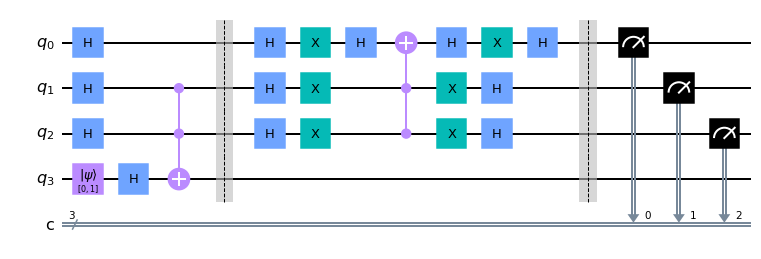

In [13]:
#circuito
#solucion: 011, 111
gc = QuantumCircuit(4,3)
gc.h([0,1,2])

#subcircuito
#gc.x(3)
gc.initialize([0, 1], 3)
gc.h(3)
gc.ccx(1, 2, 3)
gc.barrier(range(4))
gc.h([0,1,2])
gc.x([0,1,2])
gc.h(0)
gc.ccx(1,2,0)
gc.h(0)
gc.x([0,1,2])
gc.h([0,1,2])

gc.barrier(range(4))
gc.measure(range(3), range(3))

#subc.draw('mpl')
gc.draw('mpl')

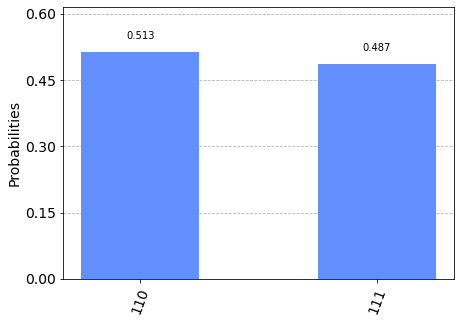

In [64]:
backend = QasmSimulator()
job = backend.run(gc, shots=1024)
result = job.result()
counts = result.get_counts(gc)
plot_histogram(counts)

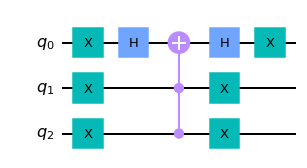

In [28]:
c = QuantumCircuit(3)
for i in range(3):
    c.x(i)
c.h(0)
c.ccx(1,2,0)
c.h(0)
for i in range(3):
    c.x(i)
c.draw('mpl')

In [32]:
state = Statevector.from_int(7, 2**3)

state = state.evolve(c)
state.draw('latex')

<IPython.core.display.Latex object>

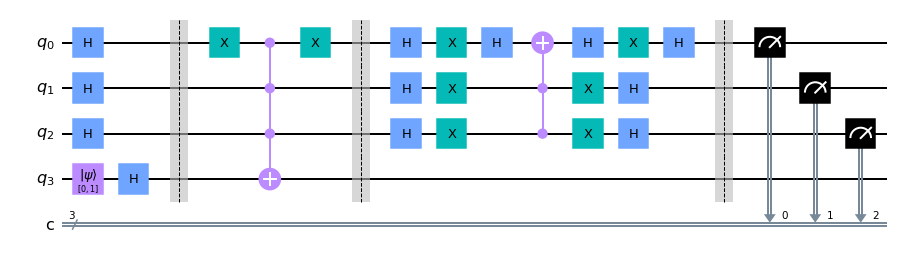

In [3]:
#circuito
#solucion: 011, 111
gc = QuantumCircuit(4,3)
gc.h([0,1,2])

#subcircuito
#gc.x(3)
gc.initialize([0, 1], 3)
gc.h(3)
gc.barrier(range(4))
gc.x(0)
gc.mcx([0, 1, 2], 3)
gc.x(0)
gc.barrier(range(4))
gc.h([0,1,2])
gc.x([0,1,2])
gc.h(0)
gc.ccx(1,2,0)
gc.h(0)
gc.x([0,1,2])
gc.h([0,1,2])

gc.barrier(range(4))
gc.measure(range(3), range(3))

#subc.draw('mpl')
gc.draw('mpl')

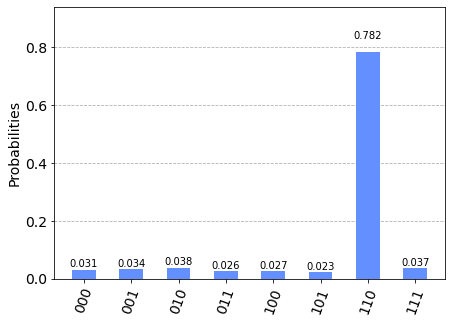

In [4]:
backend = QasmSimulator()
job = backend.run(gc, shots=1024)
result = job.result()
counts = result.get_counts(gc)
plot_histogram(counts)

In [1]:
from qiskit.test.mock import *
TOKEN = "81873f33da676c9396653a8f328c400df953e9fe99192cb798a24eb040a564c968276f0525a7ba9008fbcc65a3d69e8e8fb05605d4947e52ec76b3790a15818d"
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy, IBMQBackend
IBMQ.save_account(TOKEN)
IBMQ.load_account() 


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [6]:
def get_real_backend(nqbits):
    provider = IBMQ.get_provider(hub='ibm-q')
    small_providers = provider.backends(filters=lambda x: x.configuration().n_qubits >= nqbits
                                        and not x.configuration().simulator
                                        and x.status().operational==True)
    return least_busy(small_providers)

In [7]:
sp = get_real_backend(4)

In [8]:
job = execute(gc, backend=sp)

In [11]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

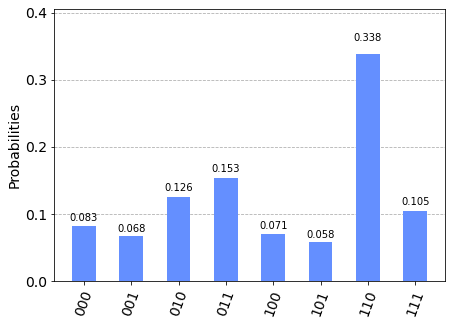

In [12]:
#real_computer_test_1
result = job.result()
counts = result.get_counts(gc)
plot_histogram(counts)

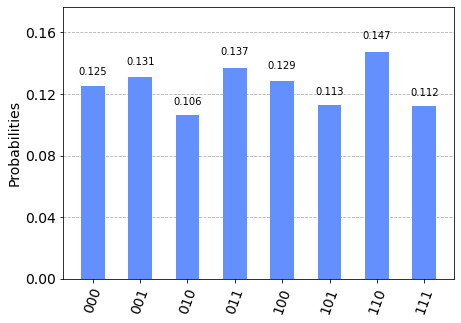

In [23]:
#real_computer_test_0
result = job.result()
counts = result.get_counts(gc)
plot_histogram(counts)